In [1]:
# I/N,N=S+I+R
def SIR(y,t,beta,gamma):
    S,I,R = y
    dSdt = -S*(I/(S+I+R))*beta
    dIdt = beta*S*I/(S+I+R)-gamma*I
    dRdt = gamma*I
    return [dSdt,dIdt,dRdt]

In [2]:
N = 58000000
I0 = 239
R0 = 31
# 初始易感者人群人数 = 总人数 - 初始感染人数 - 初始治愈人数
S0 = N - I0 - R0
y0 = [S0, I0, R0]

In [3]:
import numpy as np
from scipy.integrate import odeint
t = np.linspace(1,60,60)
beta = 0.125
gamma = 0.05
solution = odeint(SIR, y0, t, args = (beta, gamma))
# 求解微分方程

In [4]:
# 不用科学计数法
np.set_printoptions(suppress=True)
solution[0:4,0:3]

array([[57999730.        ,      239.        ,       31.        ],
       [57999698.97630736,      257.6141545 ,       43.40953815],
       [57999665.53640249,      277.67802415,       56.78557338],
       [57999629.49210659,      299.30451407,       71.20337936]])

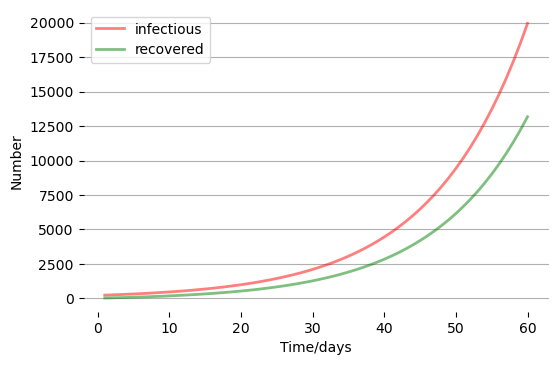

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(facecolor='w', dpi=100)

for data, color, label_name in zip([solution[:,1], solution[:,2]], ['r', 'g'], ['infectious', 'recovered']):
    ax.plot(t, data, color, alpha=0.5, lw=2, label=label_name)

ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)

In [6]:
t = np.linspace(1,360,360)
solution = odeint(SIR, y0, t, args = (beta, gamma))

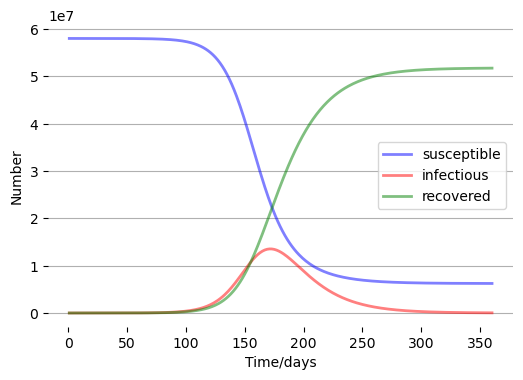

In [7]:
fig, ax = plt.subplots(facecolor='w', dpi=100)
for index, color, label_name in zip(range(3), ['b','r','g'], ['susceptible', 'infectious', 'recovered']):
    ax.plot(t, solution[:, index], color, alpha=0.5, lw=2, label=label_name)

ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)

In [8]:
import pandas as pd 
data = pd.read_csv(r'C:\Users\ASUS\Downloads\alltime_province_2020_04_04.csv')
hubei = data[data['name'] == '湖北']

In [9]:
infectious_real = hubei['total_confirm'] - hubei['total_heal'] - hubei['total_dead']
recovered_real = hubei['total_heal'] + hubei['total_dead']
susceptible_real = N - infectious_real - recovered_real

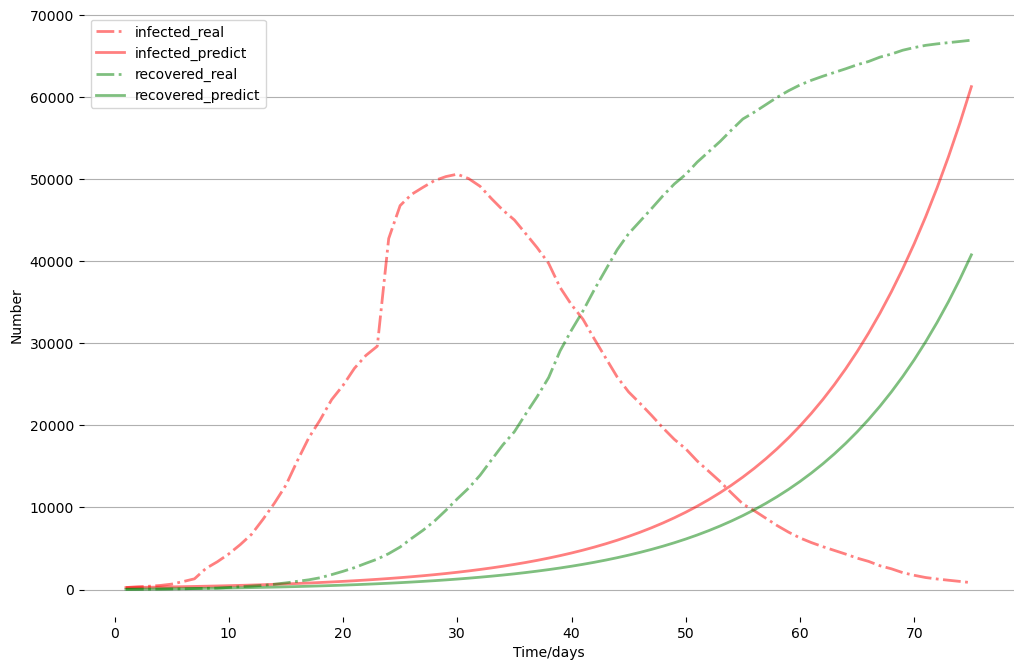

In [10]:
T = len(infectious_real)
t = np.linspace(1,T,T)
solution = odeint(SIR, y0, t, args = (beta, gamma))
fig, ax = plt.subplots(figsize=(12, 8),facecolor='w', dpi=100)

ax.plot(t, infectious_real, 'r-.', alpha=0.5, lw=2, label='infected_real')
ax.plot(t, solution[:,1], 'r', alpha=0.5, lw=2, label='infected_predict')
ax.plot(t, recovered_real, 'g-.', alpha=0.5, lw=2, label='recovered_real')
ax.plot(t, solution[:,2], 'g', alpha=0.5, lw=2, label='recovered_predict')

ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)

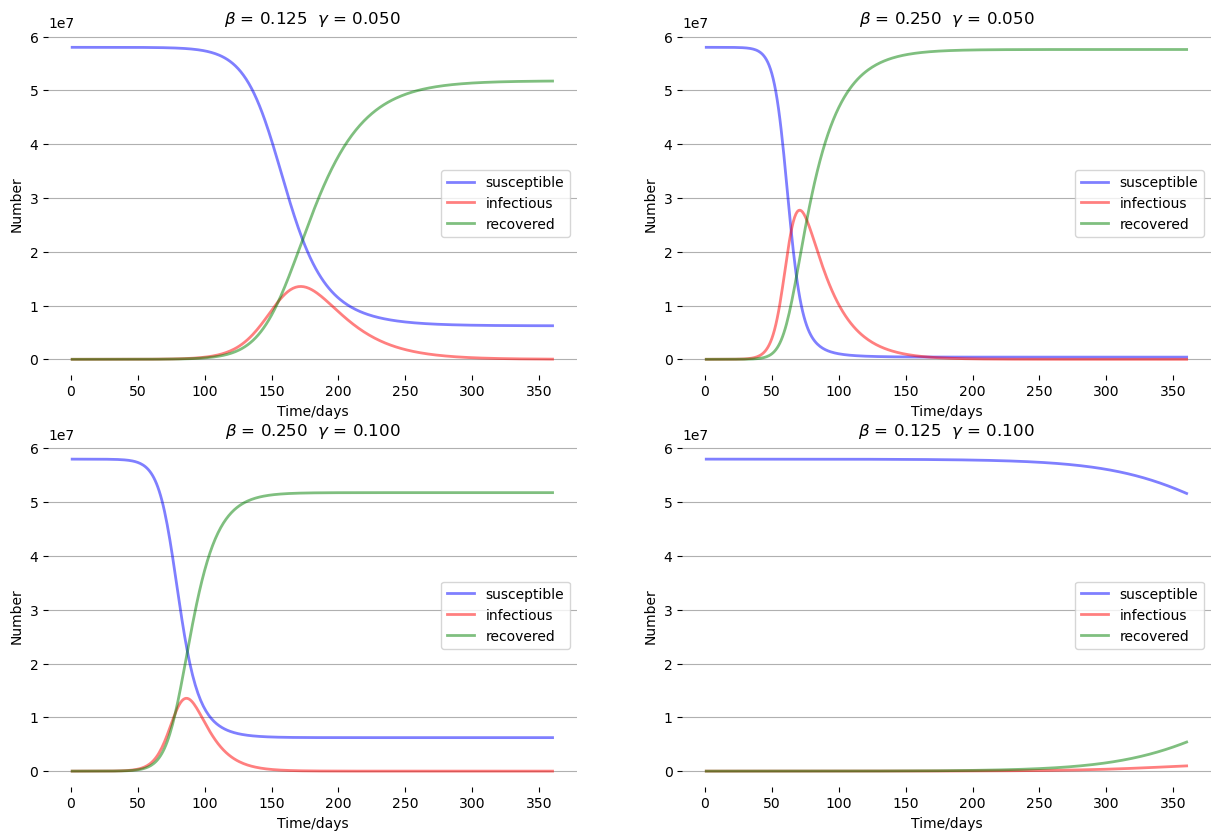

In [11]:
t = np.linspace(1,360,360)
param_list = [(0.125, 0.05),
             (0.25, 0.05),
             (0.25, 0.1),
             (0.125, 0.1)]
solution_list = [odeint(SIR, y0, t, args=item) for item in param_list]
fig = plt.figure(facecolor='w',figsize=(15,10), dpi=100)
for plot_index, solution, params in zip(range(5)[1:], solution_list, param_list):    
    ax = fig.add_subplot(int('22'+str(plot_index)))
    ax.set_title(r'$\beta$ = %.3f  $\gamma$ = %.3f' % params)    
    for index, color, label_name in zip(range(3), 
                                        ['b','r','g'],
                                        ['susceptible','infectious','recovered']):
        ax.plot(t, solution[:, index], color, alpha=0.5, lw=2, label=label_name)    
    ax.set_xlabel('Time/days')
    ax.set_ylabel('Number')
    ax.legend()
    ax.grid(axis='y')
    plt.box(False)

In [12]:
# 每日的感染者人数的预测值和真实值的均方误差和每日的治愈者人数的预测值和真实值之间的均方误差的和作为总的损失值
def loss(parameters,infectious, recovered, y0):
    size = len(infectious)
    t = np.linspace(1,size,size)
    beta, gamma = parameters
    solution = odeint(SIR, y0, t, args=(beta, gamma))
    l1 = np.mean((solution[:,1] - infectious)**2)
    l2 = np.mean((solution[:,2] - recovered)**2)
    return l1+l2

In [13]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'C:\Users\ASUS\Downloads\alltime_world_2020_04_04.csv')
italy = data[data['name']=='意大利']

In [14]:
italy.head()

,date,total_confirm,total_suspect,total_heal,total_dead,total_severe,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,name
2754,2020-01-31,2,0,0,0,0,2,0.0,0,0,NaN,NaN,意大利
2755,2020-02-01,2,0,0,0,0,0,0.0,0,0,NaN,NaN,意大利
2756,2020-02-02,2,0,0,0,0,0,0.0,0,0,NaN,NaN,意大利
2757,2020-02-03,2,0,0,0,0,0,0.0,0,0,NaN,NaN,意大利
2758,2020-02-04,2,0,0,0,0,0,0.0,0,0,NaN,NaN,意大利


In [15]:
italy_train = italy.set_index('date').loc['2020-01-31':'2020-03-15']
infectious_train = italy_train['total_confirm'] - italy_train['total_heal'] - italy_train['total_dead']
recovered_train = italy_train['total_heal'] + italy_train['total_dead']

In [16]:
N = 60000000
susceptible_train = N - recovered_train - infectious_train

In [17]:
italy_valid = italy.set_index('date').loc['2020-03-16':'2020-04-03']
infectious_valid = italy_valid['total_confirm'] - italy_valid['total_heal'] - italy_valid['total_dead']
recovered_valid = italy_valid['total_heal'] + italy_valid['total_dead']

In [18]:
from scipy.optimize import minimize
I0 = 2
R0 = 0
S0 = N - I0 - R0
y0 = [S0,I0,R0]
optimal = minimize(loss,[0.0001,0.0001],
                   args=(infectious_train,recovered_train,y0),
                   method='L-BFGS-B',
                   bounds=[(0.00000001, 1), (0.00000001, 1)])
# 求解最优化问题函数

In [19]:
beta,gamma = optimal.x
print([beta,gamma])

[0.2515246389672595, 0.03928991276962554]


In [20]:
I0_valid = 23073
R0_valid = 4907
S0_valid = N - I0_valid- R0_valid
y0_valid = [S0_valid, I0_valid, R0_valid]

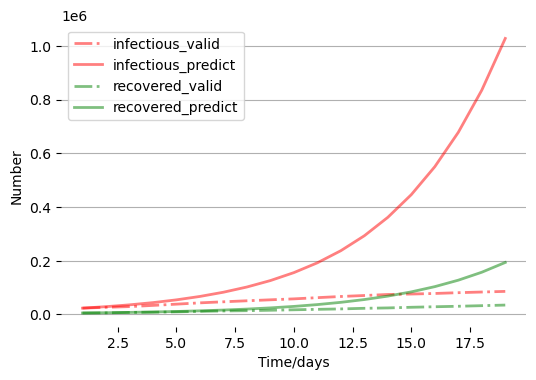

In [21]:
import matplotlib.pyplot as plt
T = len(infectious_valid)
t = np.linspace(1,T,T)
solution = odeint(SIR, y0_valid, t, args = (beta, gamma))
fig, ax = plt.subplots(facecolor='w', dpi=100)
ax.plot(t, infectious_valid, 'r-.', alpha=0.5, lw=2, label='infectious_valid')
ax.plot(t, solution[:,1], 'r', alpha=0.5, lw=2, label='infectious_predict')
ax.plot(t, recovered_valid, 'g-.', alpha=0.5, lw=2, label='recovered_valid')
ax.plot(t, solution[:,2], 'g', alpha=0.5, lw=2, label='recovered_predict')
ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)

In [22]:
class SIRModel: 
    import numpy as np
    from scipy.integrate import odeint    
    def __init__(self, beta, gamma, method):        
        self.__beta = beta
        self.__gamma = gamma
        self.__method = method  
        self.__optimal = None
        self.__predict_loss = None
    def sir_model(self, y0, t, beta, gamma):      
        S, I, R = y0
        dSdt = -beta*S*I/(S+I+R)
        dIdt = beta*S*I/(S+I+R) - gamma*I
        dRdt = gamma*I
        return [dSdt, dIdt, dRdt]    
    def loss_function(self, params, infected, recovered, y0):        
        size = len(infected)
        t = np.linspace(1,size,size)
        beta, gamma = params
        solution = odeint(self.sir_model, y0, t, args=(beta, gamma))
        l1 = np.mean((solution[:,1] - infected)**2)
        l2 = np.mean((solution[:,2] - recovered)**2)
        return l1+l2    
    def fit(self, y0, infected, recovered):
        self.__optimal = minimize(self.loss_function, [self.__beta, self.__gamma],
                                args=(infected, recovered, y0),
                                method=self.__method, 
                                bounds=[(0.00000001, 1), (0.00000001, 1)])    
    def predict(self, test_y0, days):                
        predict_result = odeint(self.sir_model, test_y0, np.linspace(1,days,days), args=tuple(self.__optimal.x))
        return predict_result    
    def get_optimal_params(self):
        return self.__optimal.x    
    def get_predict_loss(self):
        return self.__predict_loss

def get_init_data(N, I0, R0):
    S0 = N - I0 - R0
    return [S0, I0, R0]    

In [23]:
italy.tail(10)

,date,total_confirm,total_suspect,total_heal,total_dead,total_severe,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm,name
2808,2020-03-25,74386,0,9362,7503,0,5210,NaN,1036,683,NaN,NaN,意大利
2809,2020-03-26,80539,0,10361,8165,0,6153,NaN,999,662,NaN,NaN,意大利
2810,2020-03-27,86498,0,10950,9134,0,5959,0.0,589,969,0.0,NaN,意大利
2811,2020-03-28,92472,0,12384,10023,0,5974,0.0,1434,889,0.0,NaN,意大利
2812,2020-03-29,97689,0,13030,10779,0,5217,NaN,646,756,NaN,NaN,意大利
2813,2020-03-30,101739,0,14620,11591,0,4050,0.0,1590,812,0.0,NaN,意大利
2814,2020-03-31,105792,0,15729,12428,0,4053,NaN,1109,837,NaN,NaN,意大利
2815,2020-04-01,110574,0,16847,13155,0,4782,NaN,1118,727,NaN,NaN,意大利
2816,2020-04-02,115242,0,18278,13915,0,4668,NaN,1431,760,NaN,NaN,意大利
2817,2020-04-03,119827,0,19758,14681,0,4585,NaN,1480,766,NaN,NaN,意大利


In [24]:
italy.set_index('date').loc['2020-03-08']

total_confirm         7522
total_suspect            0
total_heal             622
total_dead             366
total_severe             0
today_confirm         1492
today_suspect            0
today_heal              99
today_dead             133
today_severe             0
today_storeConfirm     NaN
name                   意大利
Name: 2020-03-08, dtype: object

In [25]:
italy_train = italy.set_index('date').loc['2020-03-08':'2020-03-15']
infectious_train = italy_train['total_confirm'] - italy_train['total_heal'] - italy_train['total_dead']
recovered_train = italy_train['total_heal'] + italy_train['total_dead']

N = 60000000
I0 = 6534
R0 = 988
y0 = get_init_data(N, 8514, 1635)

model = SIRModel(0.0001, 0.0001, 'L-BFGS-B')
model.fit(y0, infectious_train, recovered_train)

best_params = model.get_optimal_params()

In [26]:
best_params

array([0.14188852, 0.02185075])

In [27]:
I0_valid = 23073
R0_valid = 4907
y0_valid = get_init_data(N, I0_valid, R0_valid)
predict_result = model.predict(y0_valid,19)

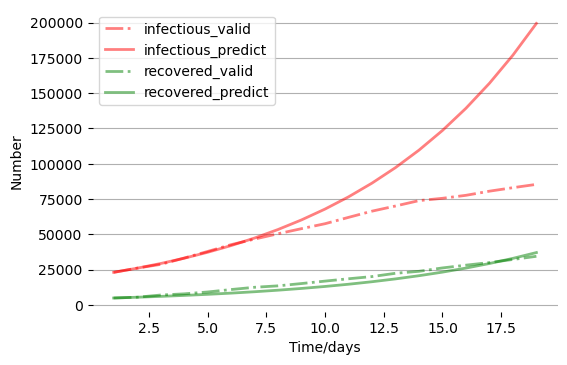

In [28]:
t = np.linspace(1,T,T)
fig, ax = plt.subplots(facecolor='w', dpi=100)

ax.plot(t, infectious_valid, 'r-.', alpha=0.5, lw=2, label='infectious_valid')
ax.plot(t, predict_result[:,1], 'r', alpha=0.5, lw=2, label='infectious_predict')
ax.plot(t, recovered_valid, 'g-.', alpha=0.5, lw=2, label='recovered_valid')
ax.plot(t, predict_result[:,2], 'g', alpha=0.5, lw=2, label='recovered_predict')

ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)

In [29]:
italy.set_index('date').loc['2020-03-31']

total_confirm         105792
total_suspect              0
total_heal             15729
total_dead             12428
total_severe               0
today_confirm           4053
today_suspect            NaN
today_heal              1109
today_dead               837
today_severe             NaN
today_storeConfirm       NaN
name                     意大利
Name: 2020-03-31, dtype: object

In [30]:
italy_train = italy.set_index('date').loc['2020-03-31':'2020-04-03']
infectious_train = italy_train['total_confirm'] - italy_train['total_heal'] - italy_train['total_dead']
recovered_train = italy_train['total_heal'] + italy_train['total_dead']

N = 60000000
I0 = 77635
R0 = 28157
y0 = get_init_data(N, I0, R0)

new_model = SIRModel(0.0001, 0.0001, 'L-BFGS-B')
new_model.fit(y0, infectious_train,recovered_train)
best_params = new_model.get_optimal_params()

In [31]:
best_params

array([0.05810776, 0.02537274])

In [32]:
N = 60000000
I0 = 85388
R0 = 34439
y0_test = get_init_data(N, I0, R0)

predict_result = new_model.predict(y0_test,730)

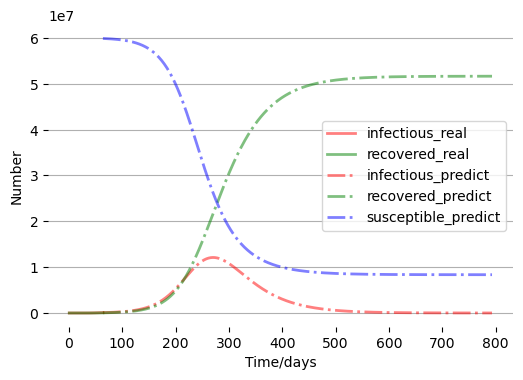

In [33]:
infectious_real = italy['total_confirm'] - italy['total_heal'] - italy['total_dead']
recovered_real = italy['total_heal'] + italy['total_dead']
t = np.linspace(1,len(infectious_real),len(infectious_real))
tpredict = np.linspace(64,793,730)

fig = plt.figure(facecolor='w',dpi=100)
ax = fig.add_subplot(111)
ax.plot(t, infectious_real, 'r', alpha=0.5, lw=2, label='infectious_real')
ax.plot(t, recovered_real, 'g', alpha=0.5, lw=2, label='recovered_real')
ax.plot(tpredict, predict_result[:,1], 'r-.', alpha=0.5, lw=2, label='infectious_predict')
ax.plot(tpredict, predict_result[:,2], 'g-.', alpha=0.5, lw=2, label='recovered_predict')
ax.plot(tpredict, predict_result[:,0], 'b-.', alpha=0.5, lw=2, label='susceptible_predict')

ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
legend = ax.legend()
ax.grid(axis='y')
plt.box(False)